In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score 
np
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor ()

In [2]:
from sklearn.model_selection import train_test_split

Read in raw data 

In [3]:
dataset=pd.read_csv('parkinsons_updrs.data.csv')
dataset

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [4]:
dataset.shape

(5875, 22)

In [5]:
dataset=dataset.drop(dataset.columns[0], axis=1) 

In [6]:
dataset=dataset.drop(dataset.columns[3], axis=1)

In [7]:
X=dataset.loc[:,dataset.columns!="total_UPDRS"]

In [8]:
y=dataset['total_UPDRS']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
X_train.shape

(4700, 19)

In [11]:
y_test.shape

(1175,)

In [12]:
y_train.shape

(4700,)

In [13]:
#fit the model to x_train and y_train 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
Y_train_pred=rf.predict(X_train)

In [15]:
Y_test_pred=rf.predict(X_test)
Y_test_pred

array([26.23016 , 26.54403 , 20.72177 , ..., 21.787074, 47.51873 ,
       35.667   ])

In [16]:
mse1=mean_squared_error(y_train,Y_train_pred)
mse1

0.4147757202728598

In [17]:
mse=mean_squared_error(y_test,Y_test_pred)
mse

3.4644459019941634

In [18]:
from math import sqrt
rmse=sqrt(mse)

In [19]:
rmse

1.861302205982189

In [20]:
#root mean squared error #testing 
np.sqrt(mse)

1.861302205982189

In [21]:
np.sqrt(mse1) #training 

0.644030837982825

In [22]:
#training score
r2_score(y_train,Y_train_pred)*100

99.63258210745252

In [23]:
#testing score
r2_score(y_test,Y_test_pred)*100

97.13245546044477

In [24]:
#Y_test_pred.to_csv('RF_predicted.csv')

In [25]:
predicted_value=Y_test_pred
true_value=y_test

In [26]:
predicted_value.shape

(1175,)

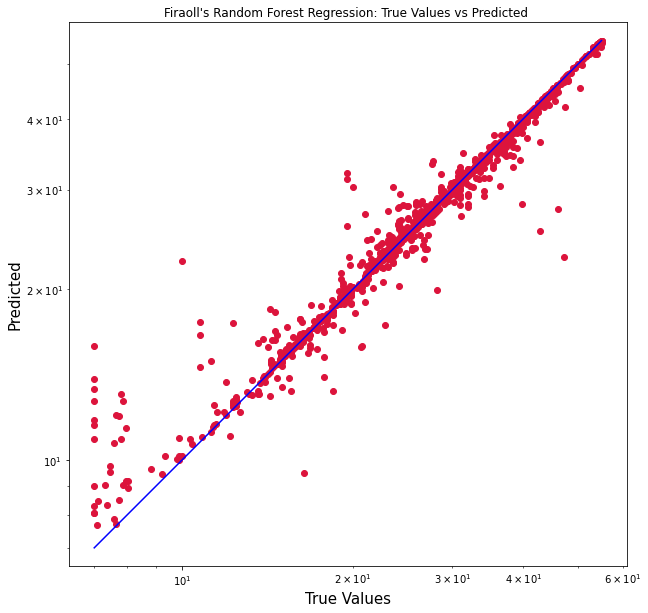

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Firaoll's Random Forest Regression: True Values vs Predicted ")
plt.axis('equal')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

accuracy_train = r2_score(y_train, y_train_pred)
print("Training Accuracy for Random Forest: ", accuracy_train*100)

accuracy_test = r2_score(y_test, y_test_pred)
print("Testing Accuracy for Random Forest: ", accuracy_test*100)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for Random Forest:  99.63258210745252
Testing Accuracy for Random Forest:  97.13245546044477
RMSE for Training Data:  0.644030837982825
RMSE for Testing Data:  1.861302205982189
